Import tools

In [2]:
import pandas as pd
import numpy as np
import sns as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

Get the data

In [3]:
df_userdata = pd.read_csv('../assets/userdata.csv')
df_userdata = df_userdata.drop(['user_id'], axis = 1)
df_userdata

,lactosevrij,thais,aziatisch,curry,hoofdgerecht,koken,glutenvrij,oven,frans,indonesisch,...,zalm,sinaasappels,paddenstoelenmix,madeira,kardemom,seizoensmelange,zure augurk,gemalen kurkuma,knoflookolijven,rodekool met appel
0,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
346,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
347,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
348,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Prediction Method

In [4]:
def predict(df, target, model):
    y = df[target]
    X = df.drop(target, axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
    model.fit(X_train, y_train)

    pred_test_y  = model.predict(X_test)

    acc_score = accuracy_score(y_test, pred_test_y)
    pre_score = precision_score(y_test, pred_test_y)
    rec_score = recall_score(y_test, pred_test_y)
    conf_matrix = confusion_matrix(y_test, pred_test_y)

    return acc_score, pre_score, rec_score, conf_matrix

Get best depth

In [5]:
depth_list = list(range(1,30))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    model = DecisionTreeClassifier(max_depth = depth_list[index])
    result = predict(df_userdata, 'frans', model)

    depth_tuning[index,1] = result[0]
    depth_tuning[index,2] = result[1]
    depth_tuning[index,3] = result[2]

col_names = ['Max depth', 'Accuracy', 'Precision', 'Recall']
pd.DataFrame(depth_tuning, columns = col_names)

,Max depth,Accuracy,Precision,Recall
0,1.0,0.933333,0.727273,0.941176
1,2.0,0.961905,1.000000,0.764706
2,3.0,0.942857,0.866667,0.764706
3,4.0,0.942857,1.000000,0.647059
4,5.0,0.942857,0.866667,0.764706
5,6.0,0.942857,0.923077,0.705882
6,7.0,0.933333,0.812500,0.764706
7,8.0,0.923810,0.800000,0.705882
8,9.0,0.952381,0.928571,0.764706
9,10.0,0.933333,0.812500,0.764706


Loop kitchens

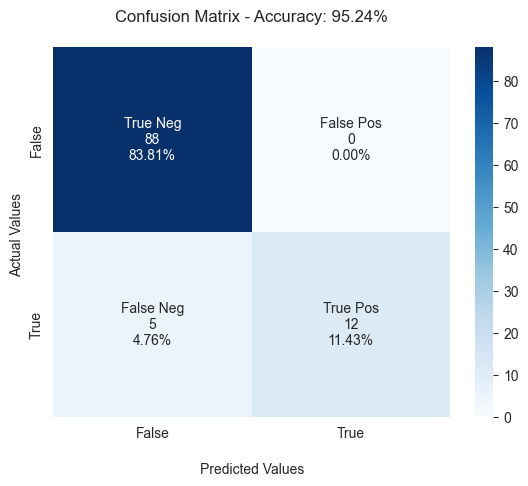

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

model = DecisionTreeClassifier(max_depth=14)
result = predict(df_userdata, 'frans', model)
acc_score = result[0]
conf_matrix = result[3]

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix - Accuracy: ' + '{0:.2%}'.format(acc_score) + '\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()